# credits 

## This project is made by
 * Youssef medhat
 * Mahmoud soliman 
 * Mohamed Antar
 * Mai maged
 * Manar Mosbah
 * Nada abdulbaky
 * Malak Azmy


# Import

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import time
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [134]:
train = pd.read_csv('D:\code\ipynb\AI  project - Copy/train.csv')
test = pd.read_csv('D:\code\ipynb\AI  project - Copy/test.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_26168\71557566.py:1: SyntaxWarning: invalid escape sequence '\c'
  train = pd.read_csv('D:\code\ipynb\AI  project - Copy/train.csv')
C:\Users\User\AppData\Local\Temp\ipykernel_26168\71557566.py:2: SyntaxWarning: invalid escape sequence '\c'
  test = pd.read_csv('D:\code\ipynb\AI  project - Copy/test.csv')


#Exploring

In [135]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [137]:
train.shape

(103904, 25)

In [138]:
test.shape

(25976, 25)

In [139]:
train.head(15)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# Data Preprocessing

nulls

In [140]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [141]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [142]:
train.dropna(subset=["Arrival Delay in Minutes"],inplace=True)


In [143]:
test.dropna(subset=["Arrival Delay in Minutes"],inplace=True)

## duplicates

In [144]:
print(train.duplicated().sum())

0


In [145]:
print(test.duplicated().sum())

0


## checking for Outliars

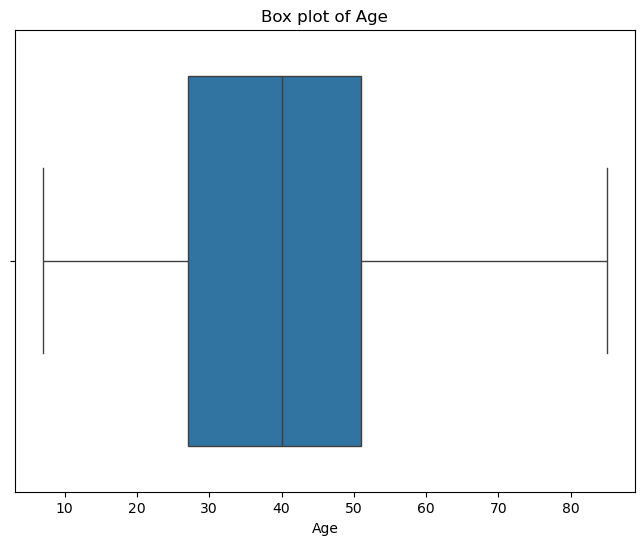

Number of outliers in 'Age': 0


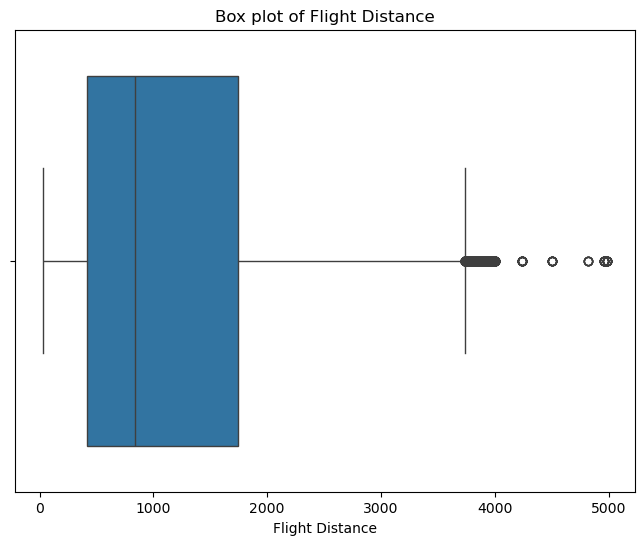

Number of outliers in 'Flight Distance': 2287


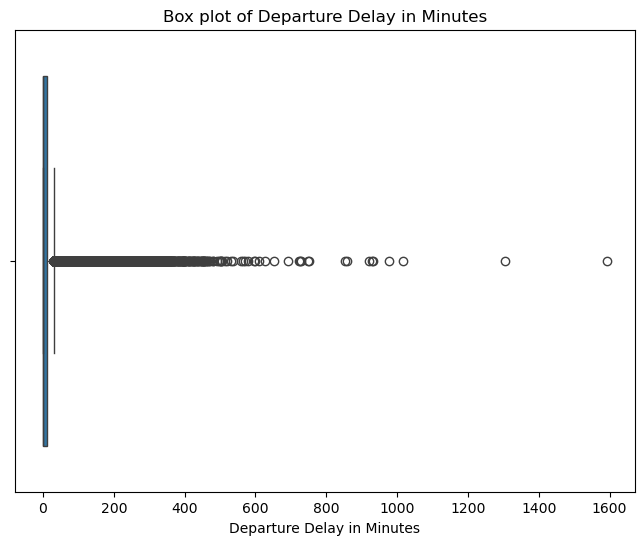

Number of outliers in 'Departure Delay in Minutes': 14428


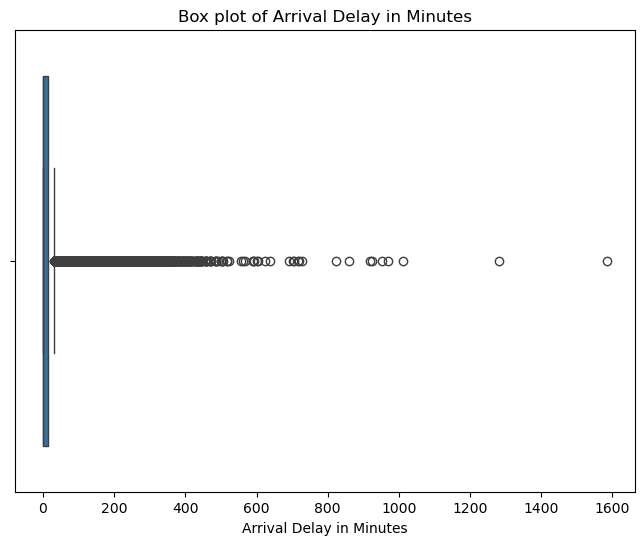

Number of outliers in 'Arrival Delay in Minutes': 13954


In [146]:
numerical_cols = train.select_dtypes(include=np.number).columns.tolist()
rating_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
               'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
               'Inflight entertainment', 'On-board service', 'Leg room service',
               'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness','satisfaction','Unnamed: 0','id']

# Ensure rating_cols only contains columns that are actually present in the DataFrame
rating_cols_present = [col for col in rating_cols if col in train.columns]

plot_cols = [col for col in numerical_cols if col not in rating_cols_present]

# Generate box plots for the selected numerical columns
for col in plot_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[col])
    plt.title(f'Box plot of {col}')
    plt.show()

    # Calculate and print the count of outliers
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_count = train[(train[col] < lower_bound) | (train[col] > upper_bound)].shape[0]
    print(f"Number of outliers in '{col}': {outliers_count}")

## encoding

In [147]:
"""
 Gender  >>  male / female
Customer Type >>   loyal /disloyal
Type of Travel >>  personal/ buisness
Class  >>  eco / buisness/ eco plus
satisfaction >> neutral or dissatisfied  /  satisfied
"""

'\n Gender  >>  male / female\nCustomer Type >>   loyal /disloyal\nType of Travel >>  personal/ buisness\nClass  >>  eco / buisness/ eco plus\nsatisfaction >> neutral or dissatisfied  /  satisfied\n'

In [148]:
label_encoder = LabelEncoder()

train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Customer Type'] = label_encoder.fit_transform(train['Customer Type'])
train['Type of Travel'] = label_encoder.fit_transform(train['Type of Travel'])
train['Class'] = label_encoder.fit_transform(train['Class'])
train['satisfaction'] = label_encoder.fit_transform(train['satisfaction'])


In [149]:
test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['Customer Type'] = label_encoder.fit_transform(test['Customer Type'])
test['Type of Travel'] = label_encoder.fit_transform(test['Type of Travel'])
test['Class'] = label_encoder.fit_transform(test['Class'])
test['satisfaction'] = label_encoder.fit_transform(test['satisfaction'])

## drop columns

In [150]:
train.drop(['id'],axis=1,inplace=True)
train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [151]:
test.drop(['id'],axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [152]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


# EDA

Data visualizations

Check the balance of the data

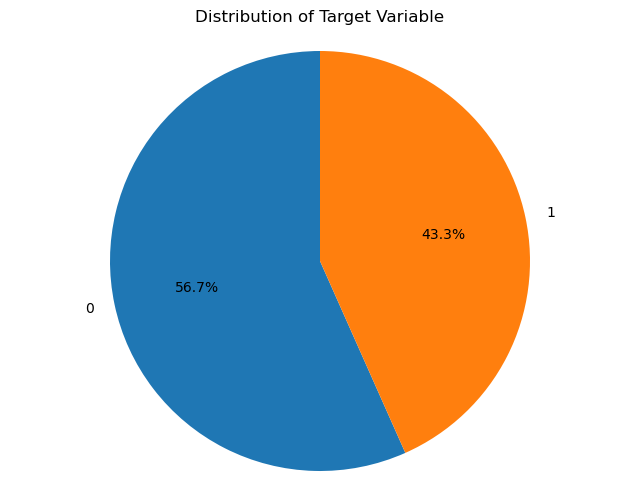

Target variable counts:


satisfaction
0    58697
1    44897
Name: count, dtype: int64

In [153]:


# Assuming 'target' is the name of your target column
target_counts = train['satisfaction'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print("Target variable counts:")
target_counts


the data is kind of imbalanced and that could affect the performance on the minor class this should be treated and it's likely to drop some random samples to match the percantage of the two clasess as we have a plenty of data records and removing the excess in the major class wouldn't be a problem we will do the undersampling

New target variable counts after undersampling:
satisfaction
1    44897
0    44897
Name: count, dtype: int64


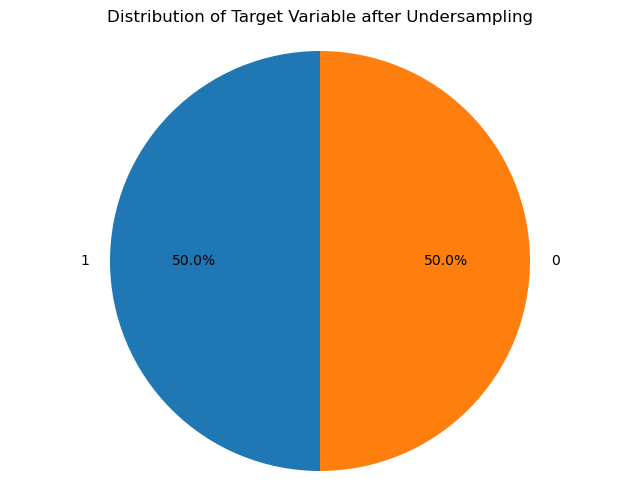

In [154]:
# Identify the majority and minority classes
majority_class = train['satisfaction'].value_counts().idxmax()
minority_class = train['satisfaction'].value_counts().idxmin()

# Get the count of the minority class
minority_count = train['satisfaction'].value_counts()[minority_class]

# Separate the majority and minority class dataframes
df_majority = train[train['satisfaction'] == majority_class]
df_minority = train[train['satisfaction'] == minority_class]

# Undersample the majority class
df_majority_undersampled = df_majority.sample(n=minority_count, random_state=42) # Use a random_state for reproducibility

# Concatenate the undersampled majority class dataframe and the minority class dataframe
train = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the dataframe to mix the samples
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new balance
print("New target variable counts after undersampling:")
print(train['satisfaction'].value_counts())

new_target_counts = train['satisfaction'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(new_target_counts, labels=new_target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable after Undersampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

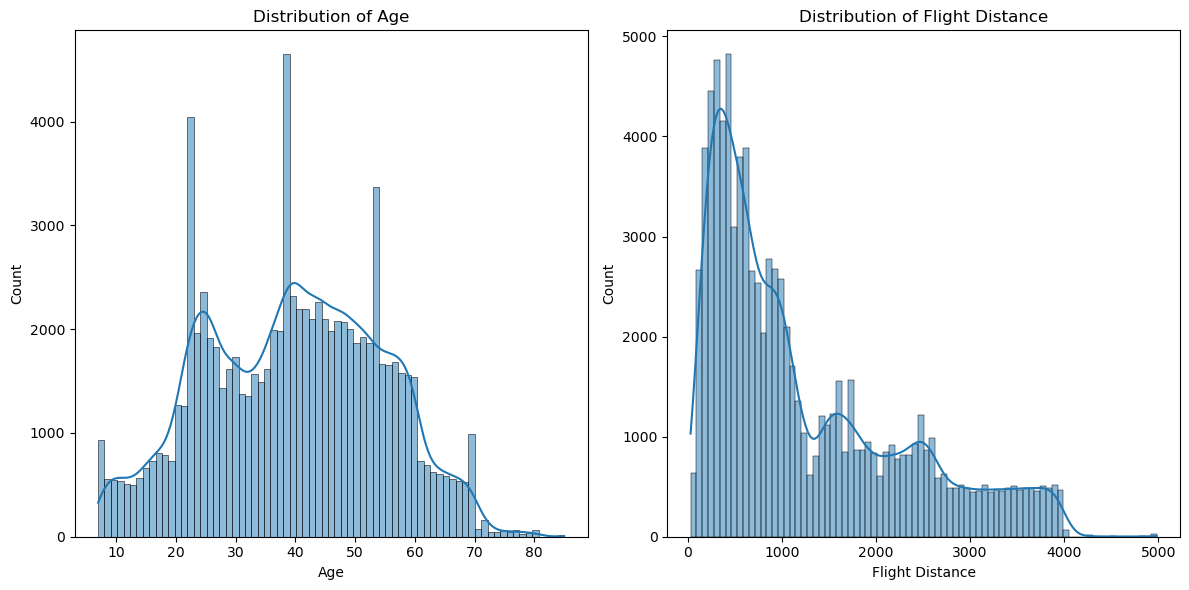

In [155]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(train['Flight Distance'], kde=True)
plt.title('Distribution of Flight Distance')

plt.tight_layout()
plt.show()


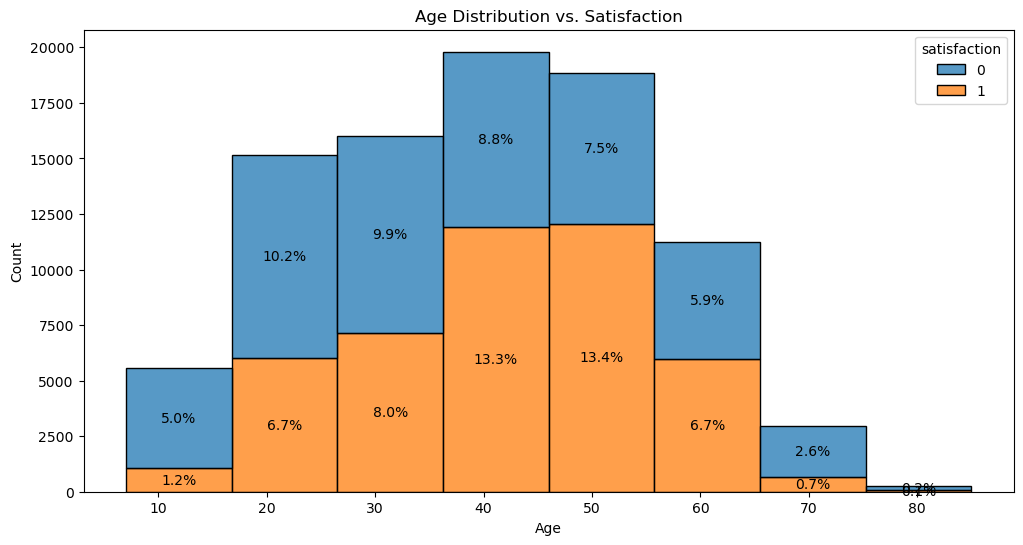

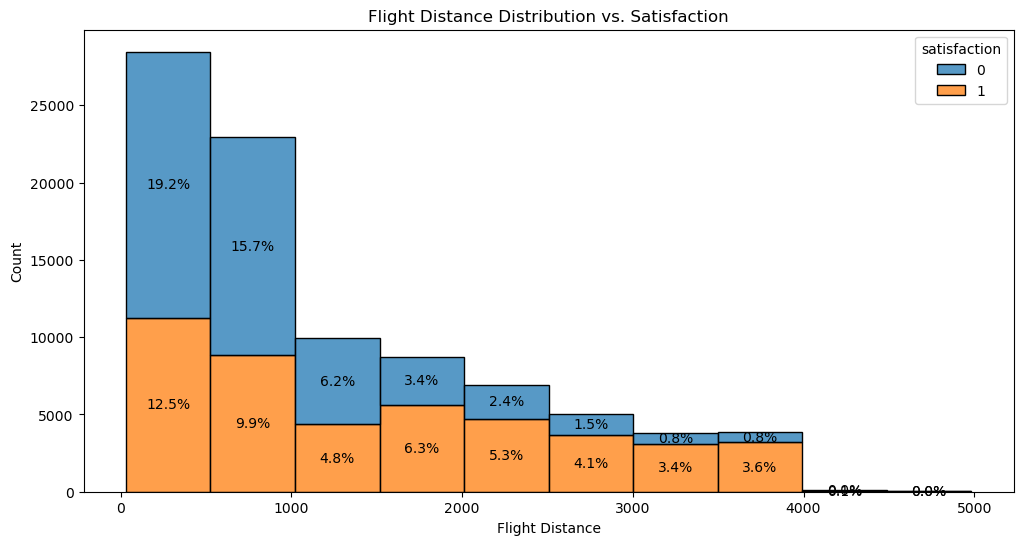

In [156]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='Age', hue='satisfaction', multiple='stack', bins=8) # Reduced bins to 8
plt.title('Age Distribution vs. Satisfaction')
plt.xlabel('Age')
plt.ylabel('Count')

# Annotate with percentages
total = len(train)
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    plt.annotate(f'{height/total:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='Flight Distance', hue='satisfaction', multiple='stack', bins=10) # Reduced bins to 10
plt.title('Flight Distance Distribution vs. Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Count')

# Annotate with percentages
total = len(train)
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    plt.annotate(f'{height/total:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


<Figure size 1000x800 with 0 Axes>

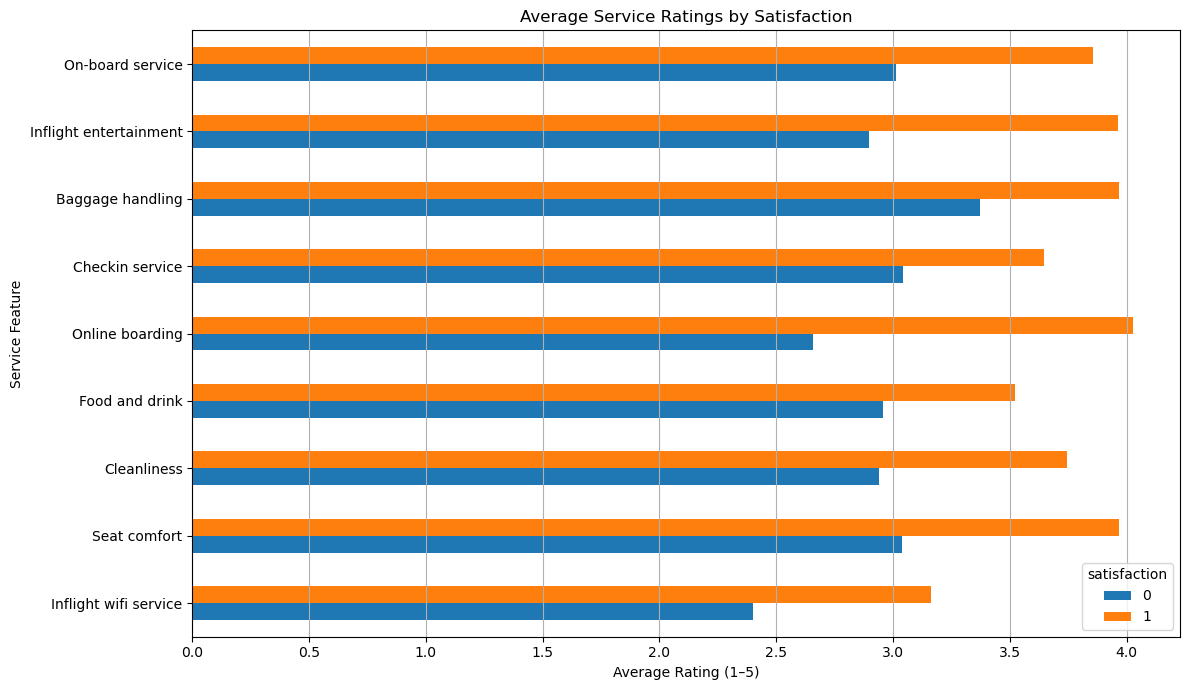

In [157]:
rating_cols = ['Inflight wifi service', 'Seat comfort', 'Cleanliness',
               'Food and drink', 'Online boarding', 'Checkin service',
               'Baggage handling', 'Inflight entertainment', 'On-board service']

mean_ratings = train.groupby('satisfaction')[rating_cols].mean().T

plt.figure(figsize=(10, 8))
mean_ratings.plot(kind='barh', figsize=(12, 7))
plt.title("Average Service Ratings by Satisfaction")
plt.xlabel("Average Rating (1–5)")
plt.ylabel("Service Feature")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


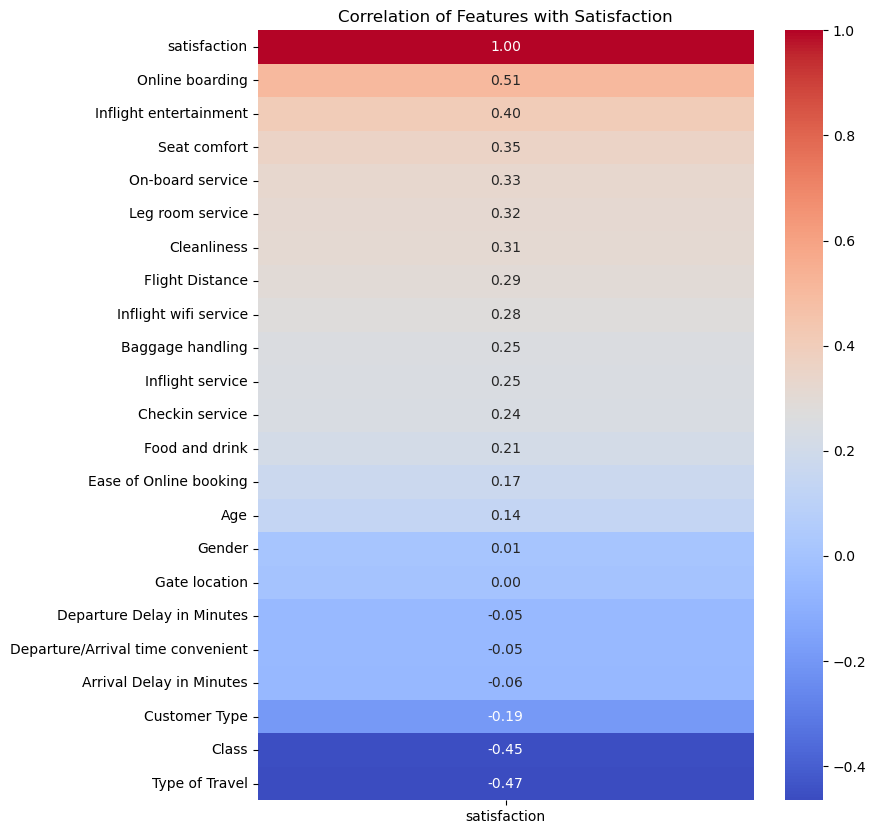

In [158]:
# Calculate the correlation matrix
correlation_matrix = train.corr()

# Extract the correlation with 'satisfaction'
satisfaction_correlation = correlation_matrix[['satisfaction']].sort_values(by='satisfaction', ascending=False)

# Create the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(satisfaction_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Satisfaction')
plt.show()

# Modeling

split data


In [159]:
X_train = train.drop(columns=['satisfaction'])  # drop the target column from the features
y_train = train['satisfaction']  # extract the target column

X_test = test.drop(columns=['satisfaction'])
y_test = test['satisfaction']

standardizing the data within a unified range 

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Model

In [161]:
reg_model = LogisticRegression()
reg_model.fit(X_train_scaled, y_train)
y_pred = reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

# Evaluate model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8661414281852238

Confusion Matrix:
 [[12723  1805]
 [ 1661  9704]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     14528
           1       0.84      0.85      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.86      0.86      0.86     25893
weighted avg       0.87      0.87      0.87     25893



Decision Tree Model

In [162]:
tree_model = DecisionTreeClassifier()


# Train the model
tree_model.fit(X_train, y_train)


# Predict on test data
y_pred_tree = tree_model.predict(X_test)


# Evaluate model performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9429961765728189

Confusion Matrix:
 [[13679   849]
 [  627 10738]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     14528
           1       0.93      0.94      0.94     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



Random Forest Model

In [163]:
RF_model = RandomForestClassifier()


# Train the model
RF_model.fit(X_train, y_train)


# Predict on test data
y_pred_RF = RF_model.predict(X_test)


# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Random Forest Accuracy: 0.9429961765728189

Confusion Matrix:
 [[13679   849]
 [  627 10738]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     14528
           1       0.93      0.94      0.94     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



KNN Model

In [164]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train, y_train)
# Predict on test data
y_pred_knn = knn_model.predict(X_test)
# Evaluate model performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

KNN Accuracy: 0.9429961765728189

Confusion Matrix:
 [[13679   849]
 [  627 10738]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     14528
           1       0.93      0.94      0.94     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893




Training XGBoost with RandomizedSearchCV...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

XGBoost with RandomizedSearchCV completed in 11.30 seconds
Best parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}
XGBoost Training Accuracy: 0.9630
XGBoost Test Accuracy: 0.9622


<Figure size 1000x600 with 0 Axes>

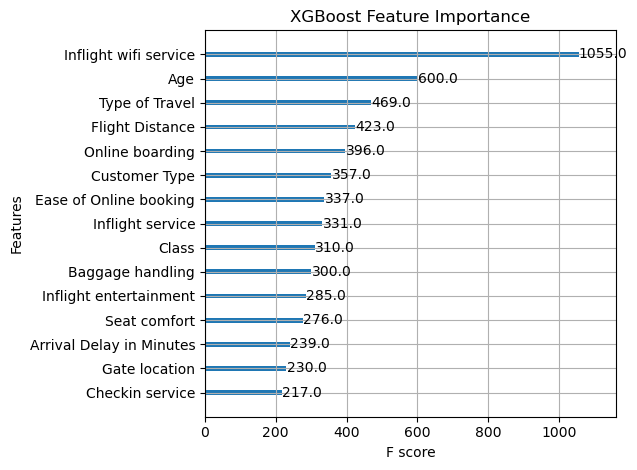

In [165]:
# Suppress XGBoost warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
print("\nTraining XGBoost with RandomizedSearchCV...")
start_time = time.time()

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1, 5]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
xgb_best = random_search.best_estimator_

# Evaluate on test set
y_pred_xgb = xgb_best.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Evaluate on training set
y_train_pred_xgb = xgb_best.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, y_train_pred_xgb)

# Print results
print(f"\nXGBoost with RandomizedSearchCV completed in {time.time() - start_time:.2f} seconds")
print(f"Best parameters: {random_search.best_params_}")
print(f"XGBoost Training Accuracy: {xgb_train_accuracy:.4f}")
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Save the model
joblib.dump(xgb_best, 'models/xgboost.pkl')

# Feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_best, max_num_features=15)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()


Using device: cuda
Fold 1 Validation Accuracy: 0.9623
Fold 2 Validation Accuracy: 0.9611
Fold 3 Validation Accuracy: 0.9624
Fold 4 Validation Accuracy: 0.9619
Fold 5 Validation Accuracy: 0.9614

Average Cross-Validation Accuracy: 0.9618


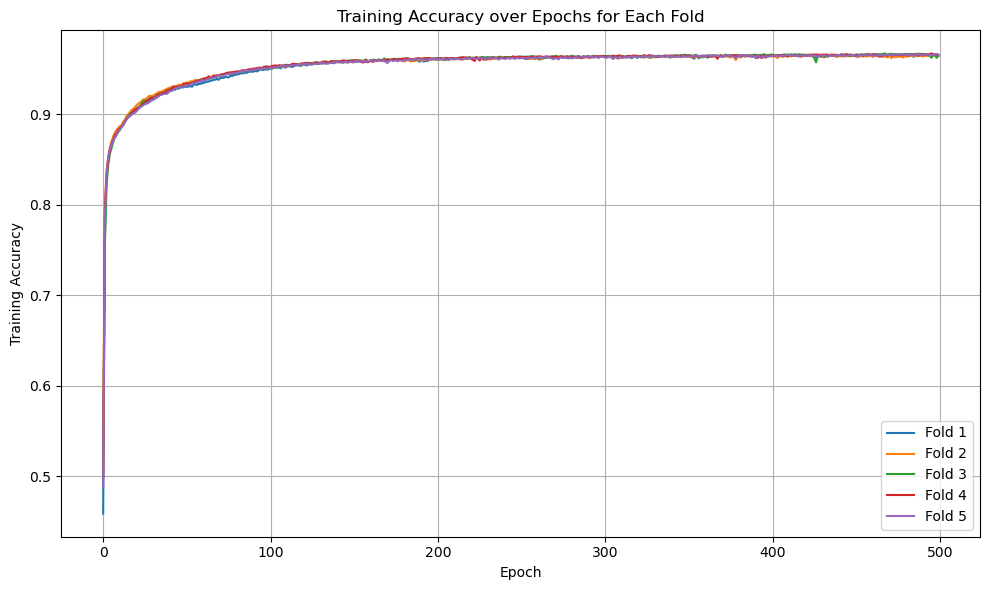

In [166]:


# Assuming X_train_scaled and y_train are already defined
X = X_train_scaled
y = y_train.values

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define the ANN model with Batch Normalization
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.PReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.PReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.PReLU(),
            nn.Dropout(0.3),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.PReLU(),

            nn.Linear(16, 2)
        )

    def forward(self, x):
        return self.model(x)

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=18)
fold = 1
accuracies = []
all_fold_accuracies = []

epochs = 500

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    X_train_tensor = torch.tensor(X_train_fold, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train_fold, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val_fold, dtype=torch.long).to(device)

    input_size = X_train_tensor.shape[1]
    model = ANN(input_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    train_accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        preds = torch.argmax(outputs, dim=1)
        acc = (preds == y_train_tensor).float().mean().item()
        train_accuracies.append(acc)

    all_fold_accuracies.append(train_accuracies)

    model.eval()
    with torch.no_grad():
        outputs = model(X_val_tensor)
        val_preds = torch.argmax(outputs, dim=1)
        val_acc = (val_preds == y_val_tensor).float().mean().item()
        print(f"Fold {fold} Validation Accuracy: {val_acc:.4f}")
        accuracies.append(val_acc)
        fold += 1

# Final average validation accuracy
print(f"\nAverage Cross-Validation Accuracy: {np.mean(accuracies):.4f}")

# Plot training accuracy for each fold
plt.figure(figsize=(10, 6))
for i, acc in enumerate(all_fold_accuracies):
    plt.plot(acc, label=f'Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs for Each Fold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [167]:
# Define device and ensure model and tensors are on the same device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move model to the device
model = model.to(device)

# Move tensors to the same device
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = torch.argmax(test_outputs, dim=1)
    test_acc = (test_preds == y_test_tensor).float().mean().item()
    print(f"\nTest Accuracy: {test_acc:.4f}")

Using device: cuda

Test Accuracy: 0.9643
